In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import pandas as pd
from sqlalchemy import create_engine
from matplotlib import pyplot as plt
import seaborn as sns

sns.set(style="darkgrid")
sns.set(color_codes=True)
sns.set(rc={'figure.figsize':(11.7, 8.27)})

In [6]:
pwd()

'/Users/g9385/code/music-streaming/notebooks'

In [7]:
e = create_engine('sqlite:///../data/processed/spotify.db', echo=False)

In [29]:
sql_top_artists = """
SELECT
    ROW_NUMBER() OVER () as rnk
    , artist_name
    , n_listens
FROM (
    SELECT
        da.artist_name
        , count(*) as n_listens
    FROM fact_listen AS fl
    INNER JOIN dim_artist AS da ON (fl.artist_id = da.id)
    GROUP BY
        fl.artist_id
    ORDER BY
        n_listens DESC
    LIMIT 15
);
"""

In [30]:
df_top_artists = pd.read_sql_query(sql_top_artists, e)
df_top_artists.head()

,rnk,artist_name,n_listens
0,1,Vision Éternel,93766
1,2,Two Steps from Hell,3836
2,3,Johann Sebastian Bach,3078
3,4,Radiohead,2234
4,5,BrunuhVille,2018


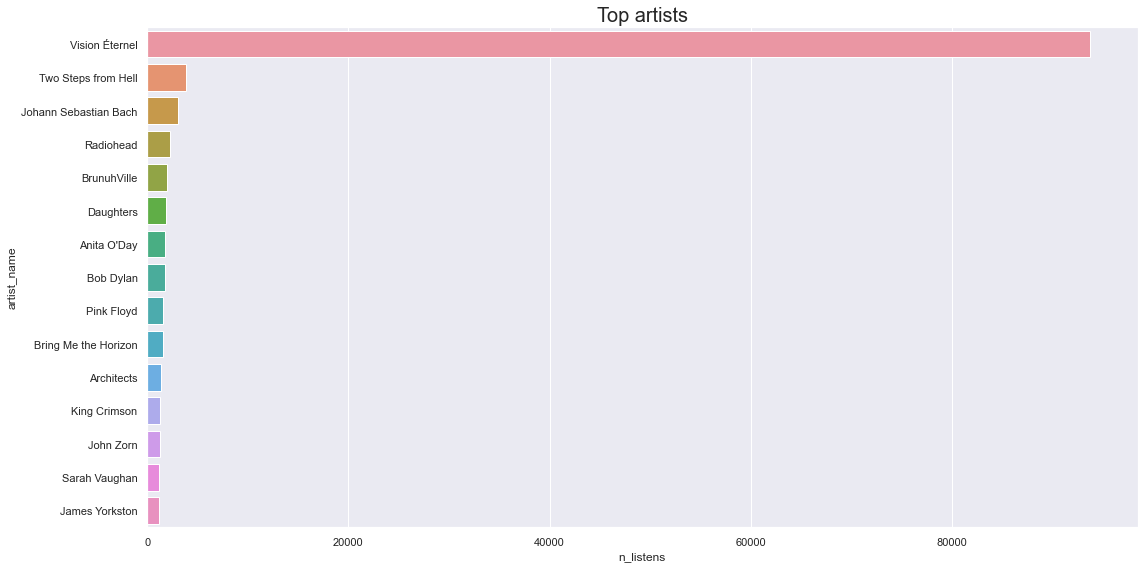

In [31]:
fig, ax = plt.subplots(figsize=(16,8))
ax.set_title("Top artists", fontsize=20, fontweight=3)
#ax.set(xlabel="feature_1mean", ylabel="feature_2mean")
sns.barplot(x="n_listens", y="artist_name", data=df_top_artists, ax=ax)
#ax.legend()
fig.tight_layout()

In [32]:
sql_top_tracks = """
SELECT
    ROW_NUMBER() OVER () as rnk
    , track_name
    , n_listens
FROM (
    SELECT
        dt.track_name
        , count(*) as n_listens
    FROM fact_listen AS fl
    INNER JOIN dim_track AS dt ON (fl.track_id = dt.id)
    GROUP BY
        fl.track_id
    ORDER BY
        n_listens DESC
    LIMIT 15
);
"""

In [33]:
df_top_tracks = pd.read_sql_query(sql_top_tracks, e)
df_top_tracks.head()

,rnk,track_name,n_listens
0,1,Sometimes in Reminiscent Neglection,2316
1,2,Sometimes in Underlying Sadness,2310
2,3,Season In Seclusion,2304
3,4,Sometimes in Absolute Togetherness,2296
4,5,Sometimes in Longing Narcosis,2294


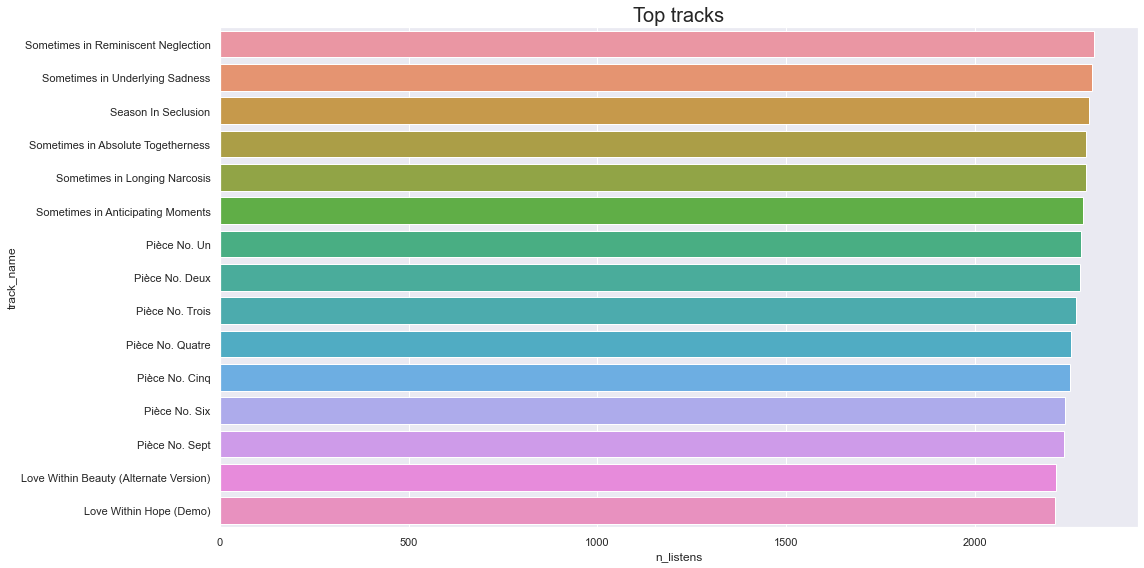

In [34]:
fig, ax = plt.subplots(figsize=(16,8))
ax.set_title("Top tracks", fontsize=20, fontweight=3)
#ax.set(xlabel="feature_1mean", ylabel="feature_2mean")
sns.barplot(x="n_listens", y="track_name", data=df_top_tracks, ax=ax)
#ax.legend()
fig.tight_layout()

In [35]:
sql_artist_breadth = """
SELECT
    ROW_NUMBER() OVER () as rnk
    , artist_name
    , breadth
FROM (
    SELECT
        da.artist_name
        , count(distinct(fl.user_id)) AS breadth
    FROM fact_listen as fl
    LEFT JOIN dim_artist AS da ON (fl.artist_id = da.id)
    GROUP BY
        da.artist_name
    ORDER BY
        breadth DESC
    LIMIT 15
);
"""

In [36]:
df_artist_breadth = pd.read_sql_query(sql_artist_breadth, e)
df_artist_breadth.head()

,rnk,artist_name,breadth
0,1,Queen,42
1,2,Nirvana,42
2,3,Daft Punk,40
3,4,Radiohead,38
4,5,Pink Floyd,38


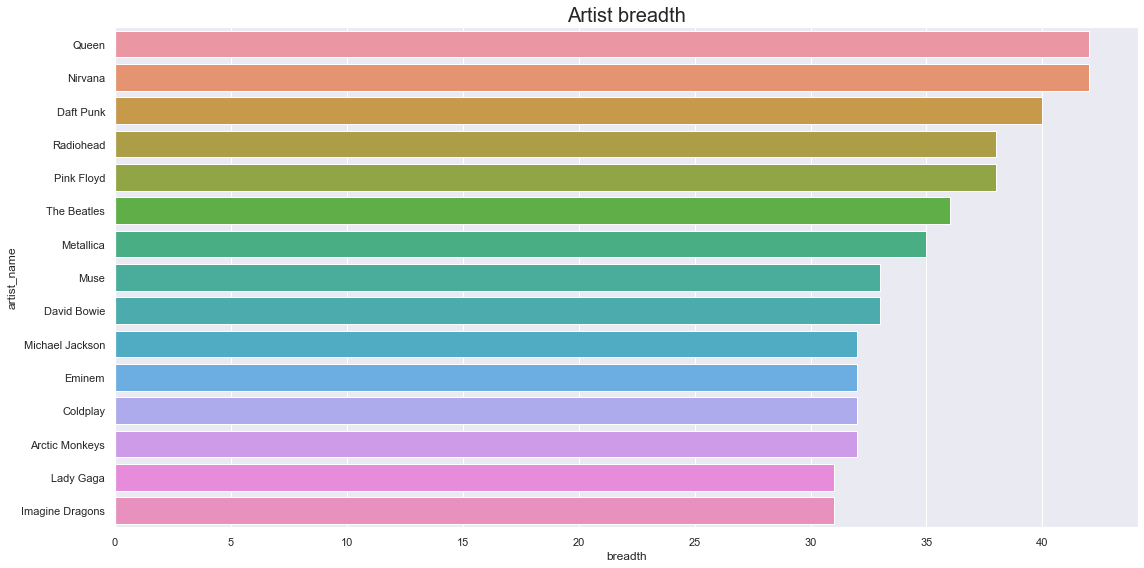

In [37]:
fig, ax = plt.subplots(figsize=(16,8))
ax.set_title("Artist breadth", fontsize=20, fontweight=3)
#ax.set(xlabel="feature_1mean", ylabel="feature_2mean")
sns.barplot(x="breadth", y="artist_name", data=df_artist_breadth, ax=ax)
#ax.legend()
fig.tight_layout()

In [38]:
sql_hour_listens = """
SELECT
    strftime('%H', listened_at) AS listened_at
    , count(*) AS listens
FROM fact_listen
GROUP BY
    strftime('%H', listened_at);
"""

In [39]:
df_hour_listens = pd.read_sql_query(sql_hour_listens, e)
df_hour_listens.head()

,listened_at,listens
0,00,23520
1,01,21140
2,02,19396
3,03,18664
4,04,18388


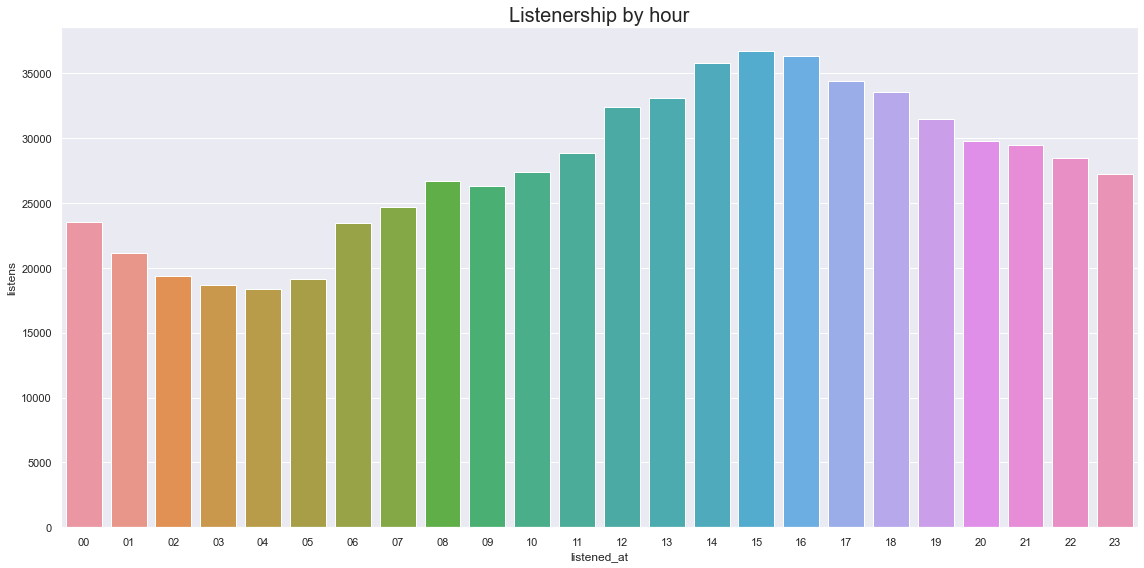

In [40]:
fig, ax = plt.subplots(figsize=(16,8))
ax.set_title("Listenership by hour", fontsize=20, fontweight=3)
#ax.set(xlabel="feature_1mean", ylabel="feature_2mean")
sns.barplot(x="listened_at", y="listens", data=df_hour_listens, ax=ax)
#ax.legend()
fig.tight_layout()

In [41]:
sql_month_listens = """
SELECT
    dd.month
    , count(*) AS listens
FROM fact_listen as fl
INNER JOIN dim_date AS dd ON (date(fl.listened_at) = dd.d)
GROUP BY
    dd.month;
"""

In [42]:
df_month_listens = pd.read_sql_query(sql_month_listens, e)
df_month_listens.head()

,month,listens
0,1,218228
1,2,182100
2,3,194326
3,4,71414


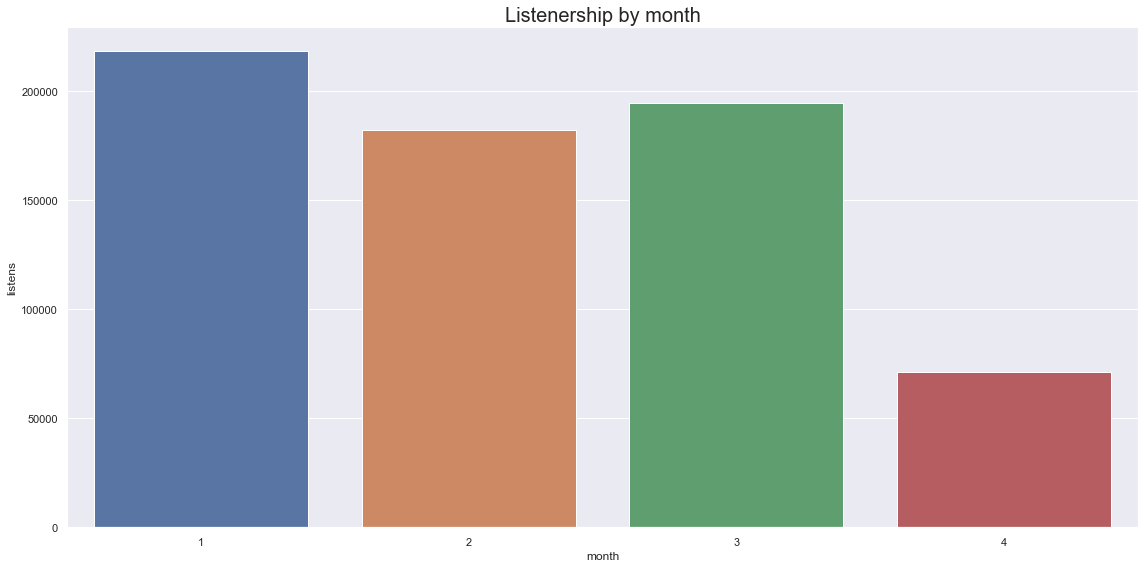

In [44]:
fig, ax = plt.subplots(figsize=(16,8))
ax.set_title("Listenership by month", fontsize=20, fontweight=3)
#ax.set(xlabel="feature_1mean", ylabel="feature_2mean")
sns.barplot(x="month", y="listens", data=df_month_listens, ax=ax)
#ax.legend()
fig.tight_layout()